Results will not be saved because no results folder has been specified.
Allocating trajectories for selectors: "resname C".
	Progress: 100%
Trajectories allocated.
Lower boundary of the hexagonal structure: 233.23501586914062


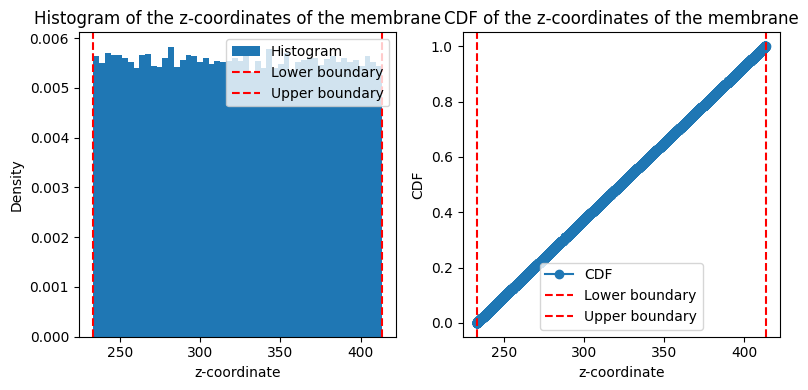

(251.23501586914062, 395.2350158691406)
Allocating trajectories for selectors: "resname DOD and name C1".
	Progress: 100%
Trajectories allocated.
(967, 2)
(63870, 2)
Kde faktor: 0.13
Kde faktor: 0.13
[0.0032057957916988983, 0.0004703676991673138]


array([[2.89295756e-01, 3.62540226e-01, 4.24777467e-01, ...,
        5.10680470e-32, 6.65157428e-34, 7.59310326e-36],
       [3.20540153e-01, 4.19695247e-01, 5.10208114e-01, ...,
        8.78090146e-31, 1.23890053e-32, 1.53200460e-34],
       [3.16553941e-01, 4.34648757e-01, 5.50425279e-01, ...,
        1.28892206e-29, 1.96870168e-31, 2.63556607e-33],
       ...,
       [1.61254838e-33, 1.19546255e-31, 7.76733632e-30, ...,
        2.84118648e-01, 2.24516662e-01, 1.62982252e-01],
       [9.27626668e-35, 7.46262293e-33, 5.26133541e-31, ...,
        2.65183149e-01, 2.19609808e-01, 1.68078351e-01],
       [4.68241248e-36, 4.08652648e-34, 3.12530517e-32, ...,
        2.20207208e-01, 1.90494046e-01, 1.53298763e-01]])

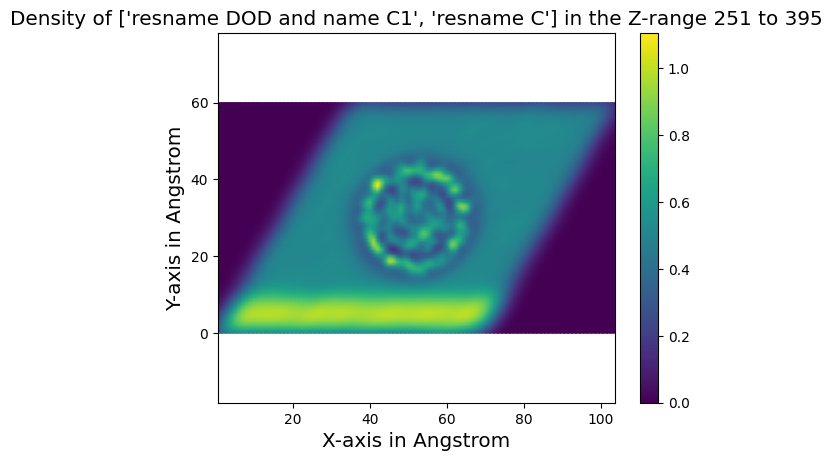

In [1]:
from MembraneAnalysisToolbox.MembraneStructures import (
    HexagonalMembrane,
)
from MembraneAnalysisToolbox.PoreAnalysis import PoreAnalysis

membrane = HexagonalMembrane(L=180, selectors="resname C")

PA = PoreAnalysis(
    topology_file="/bigpool/users/st166545/MembraneAnalysisToolbox/tests/data/hex_box_hex_dod/topol.tpr",
    trajectory_file="/bigpool/users/st166545/MembraneAnalysisToolbox/tests/data/hex_box_hex_dod/traj.xtc",
    membrane=membrane,
    analysis_max_step_size_ps=10000, # skip a lot of frames to make it faster for practicality purposes
    verbose=True,
)

PA.find_membrane_location()
PA.print_membrane_location()
PA.verify_membrane_location()


print(PA.membrane.find_zConstraints())
PA.analyseDensityNormed(
    selectors=["resname DOD and name C1", "resname C"],
    z_range=PA.membrane.find_zConstraints(),
    skip= 50,
    bw=0.13
    )